### Sterling E-Commerce Customer Segmentation

In [48]:
# !pip install yellowbrick

In [49]:
# Import Data Analysis Libraries
import numpy as np
import pandas as pd

# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# ML and Evaluation Libraries
from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
# from yellowbrick.cluster import KElbowVisualizer
from collections import Counter

# Data Normalization Libraries
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [50]:
# df1 = pd.read_excel(r"../Internship/Sterling_E-Commerce_Data.xlsx")
# df1.head()

In [51]:
# Import Data
df = pd.read_excel(r"..\Internship\Sterling_E-Commerce_Data.xlsx")
df.head()

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,Payment Method,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total
0,Health & Sports,Bode,Humboldt,112285,2008-02-11,2022-08-07,"Renaud, Maudie",F,880913,100547952.0,Easypay_MA,Bode,352808,Midwest,IA,mcrenaud,50519,3,32.0
1,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881493,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.8
2,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881492,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.9
3,Computing,Young America,Carver,112501,2013-09-15,2022-08-18,"Doiron, Latrina",F,886067,100551079.0,Payaxis,Young America,578056,Midwest,MN,lmdoiron,55552,2,6822.9
4,Entertainment,Young America,Carver,112501,2013-09-15,2022-08-20,"Doiron, Latrina",F,886878,100551618.0,Payaxis,Young America,578056,Midwest,MN,lmdoiron,55552,2,2849.9


In [52]:
df.shape

(283083, 19)

In [53]:
df['Category'].unique()

array(['Health & Sports', "Men's Fashion", 'Computing', 'Entertainment',
       'Mobiles & Tablets', 'Superstore', 'Appliances',
       'Beauty & Grooming', 'Home & Living', 'Soghaat', "Women's Fashion",
       'School & Education', 'Books', 'Kids & Baby', 'Others'],
      dtype=object)

In [54]:
df['Region'].unique()

array(['Midwest', 'West', 'South', 'Northeast'], dtype=object)

In [55]:
df['Payment Method'].unique()

array(['Easypay_MA', 'Payaxis', 'apg', 'bankalfalah', 'cod',
       'customercredit', 'easypay_voucher', 'Easypay', 'jazzvoucher',
       'jazzwallet', 'mcblite', 'cashatdoorstep', 'financesettlement'],
      dtype=object)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283083 entries, 0 to 283082
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Category        283083 non-null  object        
 1   City            283083 non-null  object        
 2   County          283083 non-null  object        
 3   Cust Id         283083 non-null  int64         
 4   Customer Since  283083 non-null  datetime64[ns]
 5   Date of Order   283083 non-null  datetime64[ns]
 6   Full Name       283083 non-null  object        
 7   Gender          283083 non-null  object        
 8   Item Id         283083 non-null  int64         
 9   Order Id        283078 non-null  float64       
 10  Payment Method  283083 non-null  object        
 11  Place Name      283083 non-null  object        
 12  Ref Num         283083 non-null  int64         
 13  Region          283083 non-null  object        
 14  State           283083 non-null  obj

**Observation**
- Order Id: Missing values
- Customer since and Date of Order: Wrong datatype [Should be an Object]

In [57]:
# Impute order quantity with mean
#df['Order Id'].fillna(df['Order Id'].mean(), inplace=True)


## Data Pre-Processing and Feature Engineering

In [58]:
# Checking for missing values
null_val = df.isnull().sum()
null_val

Category          0
City              0
County            0
Cust Id           0
Customer Since    0
Date of Order     0
Full Name         0
Gender            0
Item Id           0
Order Id          5
Payment Method    0
Place Name        0
Ref Num           0
Region            0
State             0
User Name         0
Zip               0
Qty Ordered       0
Total             0
dtype: int64

In [59]:
# Drop null values
df.dropna(inplace=True)

- Five missing values in Order Id column

In [60]:
df.isnull().sum()

Category          0
City              0
County            0
Cust Id           0
Customer Since    0
Date of Order     0
Full Name         0
Gender            0
Item Id           0
Order Id          0
Payment Method    0
Place Name        0
Ref Num           0
Region            0
State             0
User Name         0
Zip               0
Qty Ordered       0
Total             0
dtype: int64

In [61]:
# Numerical Statistical Analysis
df.describe()

,Cust Id,Customer Since,Date of Order,Item Id,Order Id,Ref Num,Zip,Qty Ordered,Total
count,283078.000000,283078,283078,283078.000000,2.830780e+05,283078.000000,283078.000000,283078.000000,283078.000000
mean,70106.401674,2007-10-11 21:38:59.406100224,2022-03-12 12:21:32.285518336,741745.081239,1.004570e+08,561103.707236,49147.444333,3.008238,816.232342
min,4.000000,1978-11-04 00:00:00,2021-10-01 00:00:00,574769.000000,1.003547e+08,111127.000000,210.000000,1.000000,0.000000
25%,56640.000000,2002-08-24 00:00:00,2021-12-24 00:00:00,659897.250000,1.004047e+08,341071.000000,26264.000000,2.000000,49.900000
50%,74320.000000,2010-03-22 00:00:00,2022-03-16 00:00:00,742468.500000,1.004518e+08,565623.000000,48808.000000,2.000000,149.800000
75%,92371.000000,2015-01-05 00:00:00,2022-05-18 00:00:00,826075.750000,1.005134e+08,782182.250000,72004.750000,3.000000,800.000000
max,115326.000000,2017-07-28 00:00:00,2022-09-30 00:00:00,905208.000000,1.005624e+08,999981.000000,99402.000000,501.000000,101262.590000
std,30215.281047,NaN,NaN,95664.051170,6.090992e+04,256099.906291,27235.638638,4.565207,1986.176881


In [62]:
# Categorical  Statistical Analysis
df.describe(include=['object', 'bool'])

,Category,City,County,Full Name,Gender,Payment Method,Place Name,Region,State,User Name
count,283078,283078,283078,283078,283078,283078,283078,283078,283078,283078
unique,15,15668,2518,63610,2,13,15668,4,49,63407
top,Mobiles & Tablets,Dekalb,Jefferson,"Gonzalez, Joel",M,cod,Dekalb,South,TX,jugonzalez
freq,60952,2525,3510,2524,144292,101745,2525,103481,17510,2524


In [63]:
# Drop unique columns
#df.drop('Cust Id', axis=1, inplace=True)

In [64]:
# Check for duplicates
dup = df.duplicated().sum()
dup

0

- No duplicates.

In [65]:
# Extract the Year, Month, Quater from Customer Since Column
df["Year"]=df["Customer Since"].dt.year
df["Month"]=df["Customer Since"].dt.month
df["Month Name"]=df["Customer Since"].dt.month_name()
df["Quarter"]=df["Customer Since"].dt.quarter

df.head(3)

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,...,Region,State,User Name,Zip,Qty Ordered,Total,Year,Month,Month Name,Quarter
0,Health & Sports,Bode,Humboldt,112285,2008-02-11,2022-08-07,"Renaud, Maudie",F,880913,100547952.0,...,Midwest,IA,mcrenaud,50519,3,32.0,2008,2,February,1
1,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881493,100548328.0,...,Midwest,IL,mgshimp,62223,2,74.8,2005,6,June,2
2,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881492,100548328.0,...,Midwest,IL,mgshimp,62223,2,74.9,2005,6,June,2


## Exploratory Data  Analysis

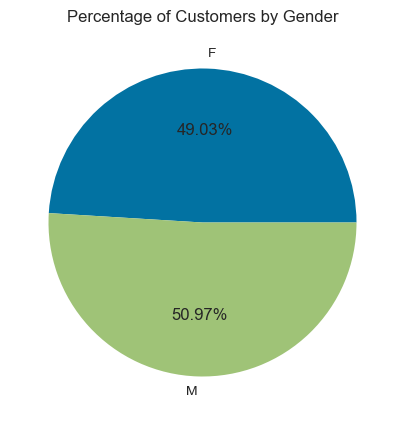

In [66]:
# plt.figure(figsize=(8,4))
# gender = sns.countplot(x=df['Gender'], order=df['Gender'].value_counts(ascending=False).index)
# values = df['Gender'].value_counts(ascending=False).values
# gender.bar_label(container=gender.containers[0], labels=values)
# plt.title("Customers by Gender")
# plt.show();

# Percentage of Customers by Gender
fig, ax = plt.subplots(figsize=(5,5))
count = Counter(df["Gender"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f"{p:.2f}%")
ax.set_title("Percentage of Customers by Gender")
plt.show();

- The number of Males customers is slightly higher than the Female customers.

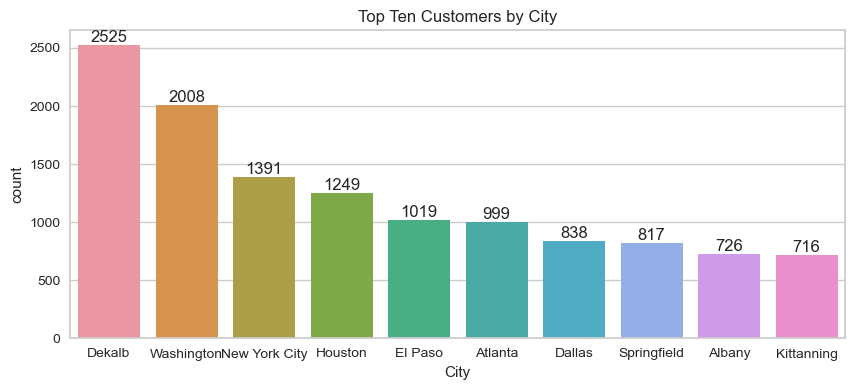

In [67]:
# Get the top five City
top_10_city = df['City'].value_counts().nlargest(10).index

top_10_city_data = df[df['City'].isin(top_10_city)]

plt.figure(figsize=(10,4))
city = sns.countplot(x=df['City'], order=top_10_city, data=top_10_city_data)
city.bar_label(container=city.containers[0], label=top_10_city)
plt.title('Top Ten Customers by City')
plt.show();

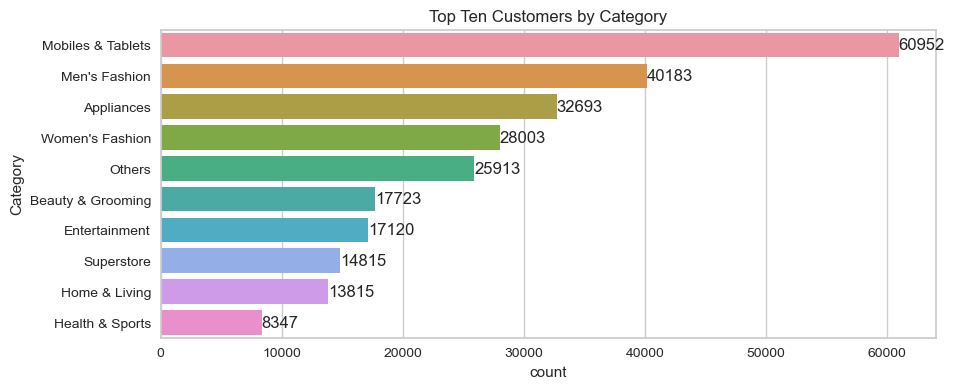

In [68]:
# Get the top ten Category
top_10_cat = df['Category'].value_counts().nlargest(10).index

top_10_data = df[df['Category'].isin(top_10_cat)]

plt.figure(figsize=(10,4))
category = sns.countplot(y=df['Category'], order=top_10_cat, data=top_10_data)
category.bar_label(container=category.containers[0], label=top_10_cat)
plt.title('Top Ten Customers by Category')
plt.show();

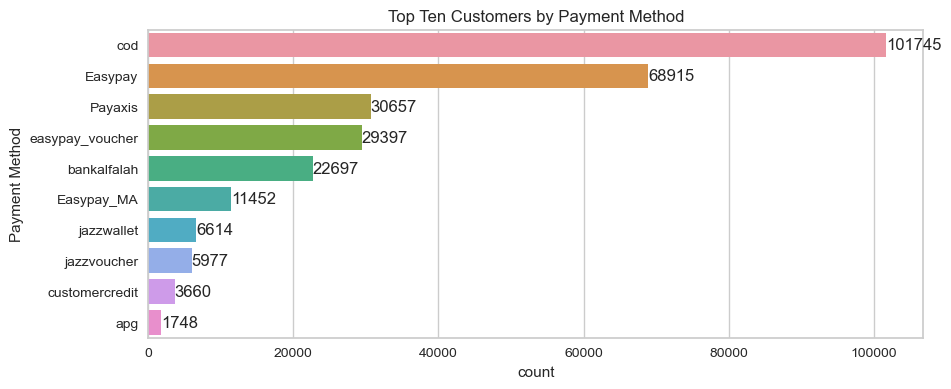

In [69]:
# Get the top ten Payment Methods
top_10_pay_meth = df['Payment Method'].value_counts().nlargest(10).index

top_10_pay_meth_data = df[df['Payment Method'].isin(top_10_pay_meth)]

plt.figure(figsize=(10,4))
pay_meth = sns.countplot(y=df['Payment Method'], order=top_10_pay_meth, data=top_10_pay_meth_data)
pay_meth.bar_label(container=pay_meth.containers[0], label=top_10_pay_meth)
plt.title('Top Ten Customers by Payment Method')
plt.show();

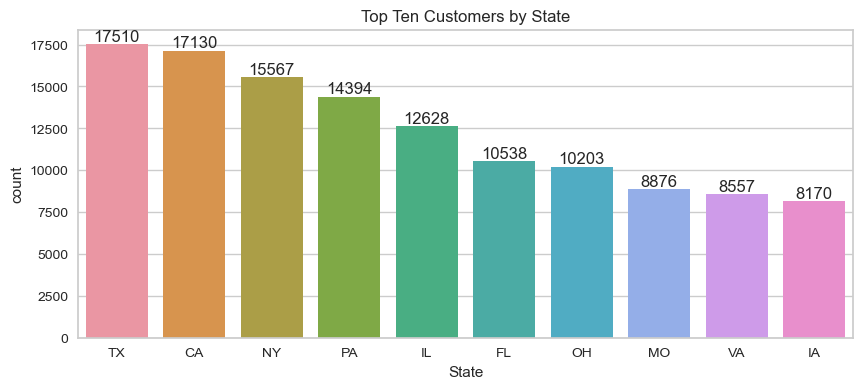

In [70]:
# Get the top ten States
top_10_states = df['State'].value_counts().nlargest(10).index

top_10_states_data = df[df['State'].isin(top_10_states)]

plt.figure(figsize=(10,4))
states = sns.countplot(x=df['State'], order=top_10_states, data=top_10_states_data)
states.bar_label(container=states.containers[0], label=top_10_states)
plt.title('Top Ten Customers by State')
plt.show();

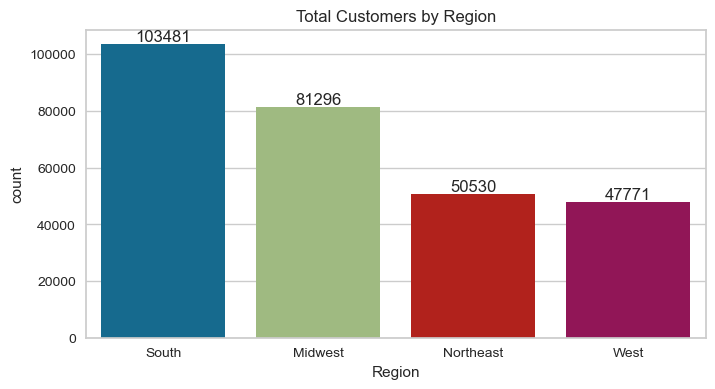

In [71]:
# Customers by Region
plt.figure(figsize=(8,4))
region = sns.countplot(x=df['Region'], order=df['Region'].value_counts(ascending=False).index)
region_val = df['Region'].value_counts(ascending=False).values
region.bar_label(container=region.containers[0], labels=region_val)
plt.title('Total Customers by Region')
plt.show();

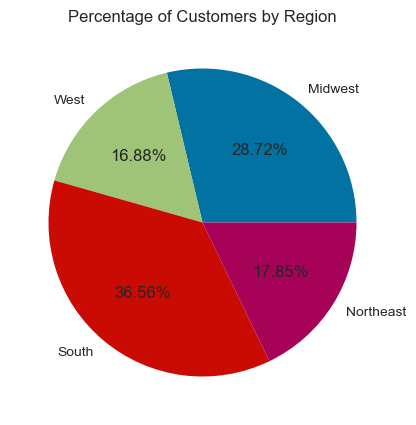

In [72]:
# Percentage of Customers by Region
fig, ax = plt.subplots(figsize=(5,5))
count = Counter(df["Region"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f"{p:.2f}%")
ax.set_title("Percentage of Customers by Region")
plt.show();

In [73]:
cust_data = df.groupby('Cust Id')
cust_data

total_sales = cust_data['Total'].sum()
total_orders = cust_data['Order Id'].size()
total_quantity = cust_data['Qty Ordered'].sum()

avg_order = total_sales / total_orders
avg__qty = total_sales / total_quantity

df1 = pd.DataFrame({'Total Sales': total_sales, 'Total Orders': total_orders, 'Average Orders': avg_order, 'Total Quantity': total_quantity});
df1.head(3)

,Total Sales,Total Orders,Average Orders,Total Quantity
Cust Id,,,,
4,27394.190,41,668.150976,82
15,216.800,6,36.133333,13
16,11868.899,20,593.444950,38


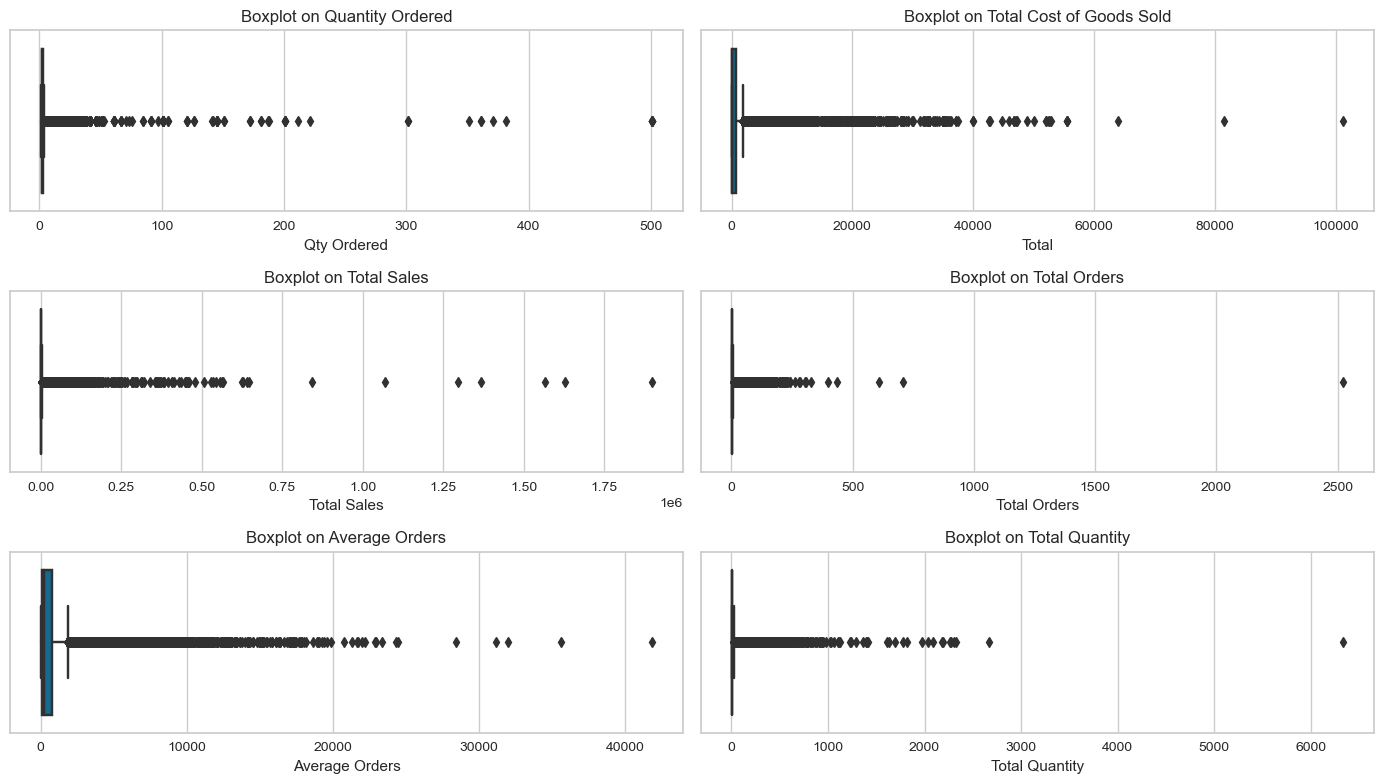

In [90]:
fig, axis = plt.subplots(3,2, figsize=(14,8))

sns.boxplot(x='Qty Ordered', data=df,  ax=axis[0,0])
axis[0,0].set_title("Boxplot on Quantity Ordered")

sns.boxplot(x='Total', data=df, ax=axis[0,1])
axis[0,1].set_title("Boxplot on Total Cost of Goods Sold")

sns.boxplot(x='Total Sales', data=df1, ax=axis[1,0])
axis[1,0].set_title('Boxplot on Total Sales')

sns.boxplot(x='Total Orders', data=df1, ax=axis[1,1])
axis[1,1].set_title('Boxplot on Total Orders')

sns.boxplot(x='Average Orders', data=df1, ax=axis[2,0])
axis[2,0].set_title('Boxplot on Average Orders')

sns.boxplot(x='Total Quantity', data=df1, ax=axis[2,1])
axis[2,1].set_title('Boxplot on Total Quantity')

plt.tight_layout();

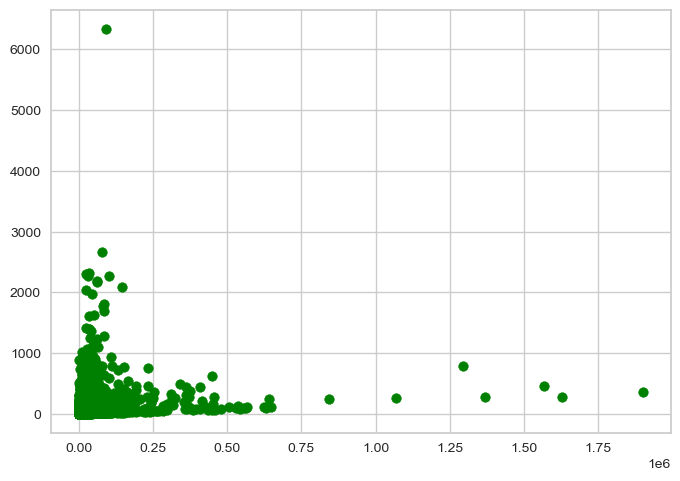

In [75]:
# Before Normalization
plt.scatter(data=df1, x='Total Sales', y='Total Quantity', marker='o', color='green');

## Data Normalization

In [76]:
scaler = MinMaxScaler()
df1_scaled = pd.DataFrame(scaler.fit_transform(df1), index=df1.index, columns=df1.columns)
df1_scaled.head(3)

,Total Sales,Total Orders,Average Orders,Total Quantity
Cust Id,,,,
4,0.014416,0.015854,0.015958,0.012780
15,0.000114,0.001982,0.000863,0.001893
16,0.006246,0.007531,0.014174,0.005838


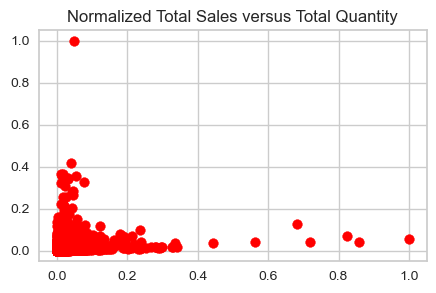

In [77]:
plt.figure(figsize=(5, 3))
plt.scatter(data=df1_scaled, x='Total Sales', y='Total Quantity', marker='o', color='red');
plt.title('Normalized Total Sales versus Total Quantity')
plt.show();

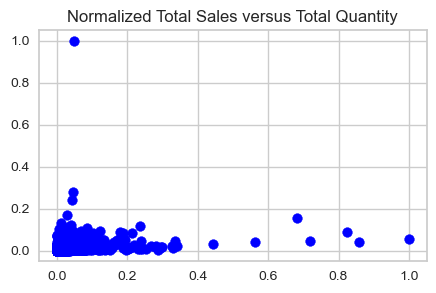

In [78]:
plt.figure(figsize=(5, 3))
plt.scatter(data=df1_scaled, x='Total Sales', y='Total Orders', marker='o', color='blue');
plt.title('Normalized Total Sales versus Total Quantity')
plt.show();

In [103]:
# df1.info()
df1_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63646 entries, 4 to 115326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Total Sales     63646 non-null  float64
 1   Total Orders    63646 non-null  float64
 2   Average Orders  63646 non-null  float64
 3   Total Quantity  63646 non-null  float64
dtypes: float64(4)
memory usage: 2.4 MB


In [80]:

# df2 = df1_scaled.iloc[:, [0,1,2,3]].values
# df2

array([[2.73941900e+04, 4.10000000e+01, 6.68150976e+02, 8.20000000e+01],
       [2.16800000e+02, 6.00000000e+00, 3.61333333e+01, 1.30000000e+01],
       [1.18688990e+04, 2.00000000e+01, 5.93444950e+02, 3.80000000e+01],
       ...,
       [3.99000000e+01, 1.00000000e+00, 3.99000000e+01, 2.00000000e+00],
       [8.99000000e+01, 2.00000000e+00, 4.49500000e+01, 4.00000000e+00],
       [3.55990000e+03, 1.00000000e+00, 3.55990000e+03, 2.00000000e+00]])

In [87]:
# elbow = KElbowVisualizer(estimator=KMeans())
# elbow.fit(df1_scaled)

### Within clusters sum of square (WCSS)
- Sum of square distance bewteen each point and the centroid in a cluster.
- As the number of clusters increase the value of WCSS decrease.
- k-means++ ensures smarter initialization of the centroids and improves the quality of clustering.
- kmeans(inertia_) is used to seggregate the data points into clusters.

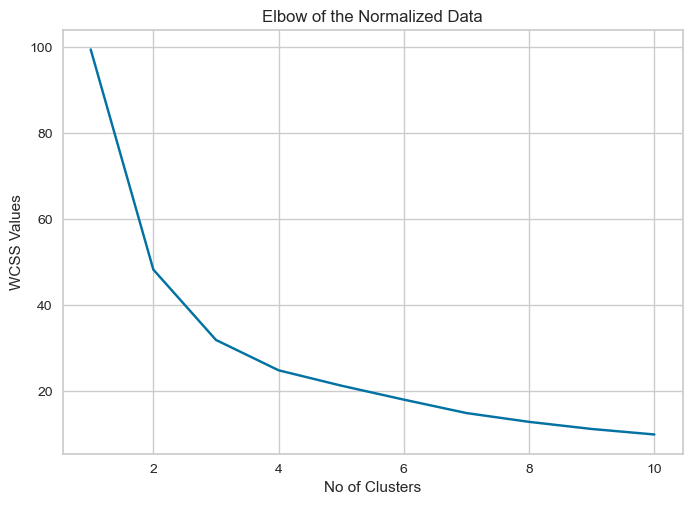

In [104]:
wcss = []

# Find optimal value of the elbow
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df1_scaled)
    wcss.append(kmeans.inertia_)
    
# Plot the Elbow
plt.plot(range(1,11), wcss)
plt.title('Elbow of the Normalized Data')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS Values')
plt.show()

- The Elbow is at 3, meaning the maximum number of clusters is 3.

In [105]:
df1_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63646 entries, 4 to 115326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Total Sales     63646 non-null  float64
 1   Total Orders    63646 non-null  float64
 2   Average Orders  63646 non-null  float64
 3   Total Quantity  63646 non-null  float64
dtypes: float64(4)
memory usage: 2.4 MB


In [106]:
# Extract columns based on their index
df2 = df1_scaled.iloc[:, [0,1]].values
df2

array([[1.44157952e-02, 1.58541419e-02],
       [1.14087856e-04, 1.98176774e-03],
       [6.24583596e-03, 7.53071740e-03],
       ...,
       [2.09967963e-05, 0.00000000e+00],
       [4.73085712e-05, 3.96353547e-04],
       [1.87334575e-03, 0.00000000e+00]])

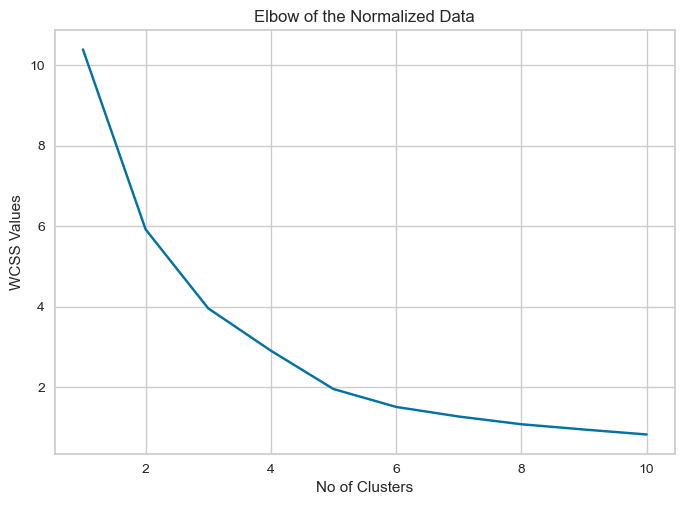

In [107]:
wcss = []

# Find optimal value of the elbow
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)
    
# Plot the Elbow
plt.plot(range(1,11), wcss)
plt.title('Elbow of Totl Sales vs Total Orders')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS Values')
plt.show()

- The number of clusters is 5.

### Model Building

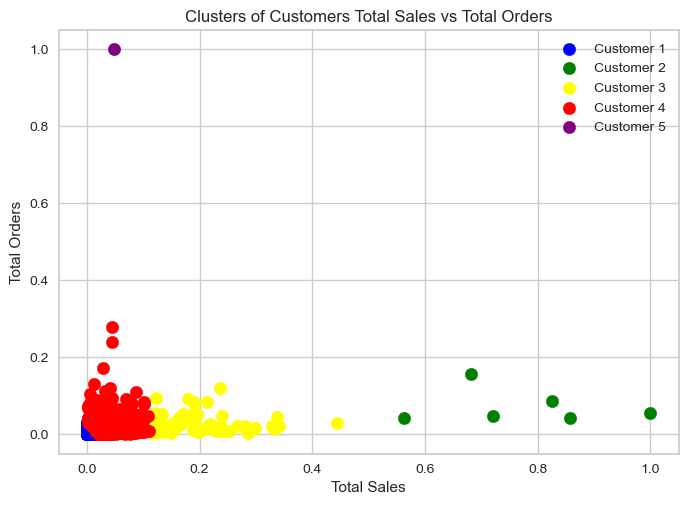

In [117]:
# Initialize K-Means
kmeansmodel = KMeans(n_clusters=5, init='k-means++', random_state=0)

y_kmeans = kmeansmodel.fit_predict(df2)

# plot for each cluster
plt.scatter(df2[y_kmeans == 0,0], df2[y_kmeans == 0,1], s=80, c='blue', label='Customer 1')
plt.scatter(df2[y_kmeans == 1,0], df2[y_kmeans == 1,1], s=80, c='green', label='Customer 2')
plt.scatter(df2[y_kmeans == 2,0], df2[y_kmeans == 2,1], s=80, c='yellow', label='Customer 3')
plt.scatter(df2[y_kmeans == 3,0], df2[y_kmeans == 3,1], s=80, c='red', label='Customer 4')
plt.scatter(df2[y_kmeans == 4,0], df2[y_kmeans == 4,1], s=80, c='purple', label='Customer 5')

plt.title('Clusters of Customers Total Sales vs Total Orders')
plt.xlabel('Total Sales')
plt.ylabel('Total Orders')
plt.legend()
plt.show()

In [108]:
# Extract columns based on their index
df3 = df1_scaled.iloc[:, [0,3]].values
df3

array([[1.44157952e-02, 1.27800568e-02],
       [1.14087856e-04, 1.89334175e-03],
       [6.24583596e-03, 5.83780372e-03],
       ...,
       [2.09967963e-05, 1.57778479e-04],
       [4.73085712e-05, 4.73335437e-04],
       [1.87334575e-03, 1.57778479e-04]])

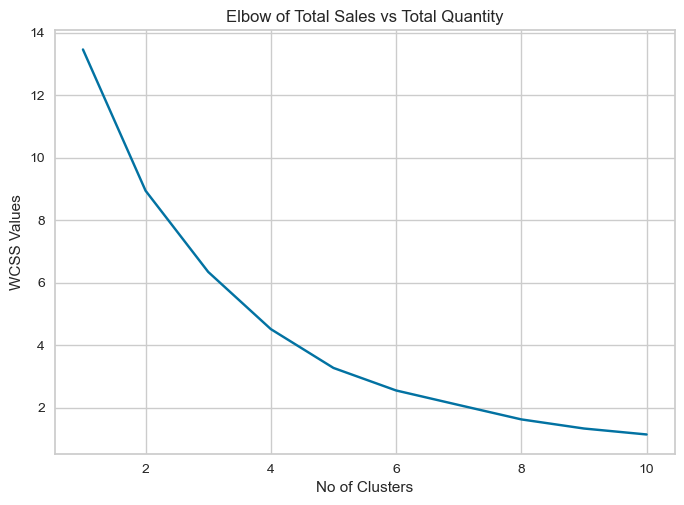

In [112]:
wcss = []

# Find optimal value of the elbow
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df3)
    wcss.append(kmeans.inertia_)
    
# Plot the Elbow
plt.plot(range(1,11), wcss)
plt.title('Elbow of Total Sales vs Total Quantity')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS Values')
plt.show()

- The number of clusters is 5.

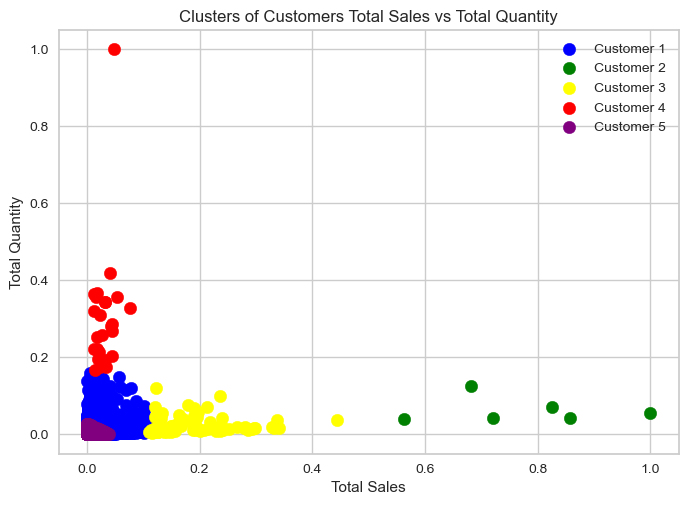

In [118]:
# Initialize K-Means
kmeansmodel = KMeans(n_clusters=5, init='k-means++', random_state=0)

# Make prediciton
y_kmeans = kmeansmodel.fit_predict(df3)

# plot for each cluster
plt.scatter(df3[y_kmeans == 0,0], df3[y_kmeans == 0,1], s=80, c='blue', label='Customer 1')
plt.scatter(df3[y_kmeans == 1,0], df3[y_kmeans == 1,1], s=80, c='green', label='Customer 2')
plt.scatter(df3[y_kmeans == 2,0], df3[y_kmeans == 2,1], s=80, c='yellow', label='Customer 3')
plt.scatter(df3[y_kmeans == 3,0], df3[y_kmeans == 3,1], s=80, c='red', label='Customer 4')
plt.scatter(df3[y_kmeans == 4,0], df3[y_kmeans == 4,1], s=80, c='purple', label='Customer 5')

plt.title('Clusters of Customers Total Sales vs Total Quantity')
plt.xlabel('Total Sales')
plt.ylabel('Total Quantity')
plt.legend()
plt.show()